In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip '/content/drive/MyDrive/ResearchWork_2023/OIA_ODIR/TrainSet/Train_Images.zip'
!unzip '/content/drive/MyDrive/ResearchWork_2023/OIA_ODIR/TestSet/Test_Images.zip'
!unzip '/content/drive/MyDrive/ResearchWork_2023/OIA_ODIR/ValidSet/val_Images.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Images/4276_left.jpg    
  inflating: Images/4276_right.jpg   
  inflating: Images/4277_left.jpg    
  inflating: Images/4277_right.jpg   
  inflating: Images/4278_left.jpg    
  inflating: Images/4278_right.jpg   
  inflating: Images/4279_left.jpg    
  inflating: Images/4279_right.jpg   
  inflating: Images/427_left.jpg     
  inflating: Images/427_right.jpg    
  inflating: Images/4280_left.jpg    
  inflating: Images/4280_right.jpg   
  inflating: Images/4281_left.jpg    
  inflating: Images/4281_right.jpg   
  inflating: Images/4282_left.jpg    
  inflating: Images/4282_right.jpg   
  inflating: Images/4283_left.jpg    
  inflating: Images/4283_right.jpg   
  inflating: Images/4284_left.jpg    
  inflating: Images/4284_right.jpg   
  inflating: Images/4285_left.jpg    
  inflating: Images/4285_right.jpg   
  inflating: Images/4286_left.jpg    
  inflating: Images/4286_right.jpg   
  inflating: Images/4287_left.jpg    

In [4]:

# Load the pre-trained Inception-ResNet-V2 model
base_model = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(299,299,3))

# Freeze the pre-trained weights
base_model.trainable = False

# Pass the input layer through the pre-trained model
features = base_model.output

outputs = tf.keras.layers.Flatten()(features)
outputs = tf.keras.layers.Dense(units=8, activation='sigmoid')(outputs)

80134624/80134624 [==============================] - 4s 0us/step


In [5]:
# !pip install tensorflow_addons
# import tensorflow_addons as tfa
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
# f1_score = tfa.metrics.F1Score(num_classes=8)

In [6]:

# Create the model
model = tf.keras.Model(inputs=base_model.input, outputs=outputs)
# Compile the model
# base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', precision , recall])

In [7]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 299, 299, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 299, 299, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 149, 149, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 149, 149, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 149, 149, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 74, 74, 128)       0     

In [8]:

# Load the image data and one-hot encoded multi-label data
# Load the data from the excel sheet into a pandas dataframe
# Load both left and right eye dataset
base_path = '/content/drive/MyDrive/ResearchWork_2023/OIA_ODIR'
train_df = pd.read_excel(f'{base_path}/TrainSet/Annotation/train_labels.xlsx')
test_df = pd.read_excel(f'{base_path}/TestSet/Annotation/test_labels.xlsx')
val_df = pd.read_excel(f'{base_path}/ValidSet/Annotation/val_labels.xlsx')


In [9]:
train_df

,Unnamed: 0.1,Unnamed: 0,Fundus,Diagnostic_Keywords,N,D,G,C,A,H,M,O
0,0,0,0_left.jpg,cataract,0,0,0,1,0,0,0,0
1,1,1,1_left.jpg,normal fundus,1,0,0,0,0,0,0,0
2,2,2,2_left.jpg,laser spot，moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,3,3_left.jpg,normal fundus,1,0,0,0,0,0,0,0
4,4,4,4_left.jpg,macular epiretinal membrane,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6954,3478,3495,4686_right.jpg,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0
6955,3479,3496,4688_right.jpg,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
6956,3480,3497,4689_right.jpg,normal fundus,1,0,0,0,0,0,0,0
6957,3481,3498,4690_right.jpg,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0


# Train

In [10]:
labels = test_df.iloc[:, 3:].values

In [11]:
labels

array([['cataract,hypertensive retinopathy', 0, 0, ..., 1, 0, 0],
       ['cataract,hypertensive retinopathy', 0, 0, ..., 1, 0, 0],
       ['hypertensive retinopathy,macular epiretinal membrane', 0, 0,
        ..., 1, 0, 1],
       ...,
       ['normal fundus', 1, 0, ..., 0, 0, 0],
       ['moderate nonproliferative retinopathy', 0, 0, ..., 0, 0, 1],
       ['moderate nonproliferative retinopathy', 0, 0, ..., 0, 0, 1]],
      dtype=object)

In [12]:
# Split the data into two arrays, one for the image paths and one for the labels
train_images_base_path = '/content/Images/'
image_paths = train_images_base_path + train_df["Fundus"].values
labels = train_df.iloc[:, 4:].values

# Convert the lists to tensors
image_paths = tf.constant(image_paths)
labels = tf.constant(labels)

# Create a dataset from the image paths and labels
train_dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))

# Test

In [13]:

# Split the data into two arrays, one for the image paths and one for the labels
test_images_base_path = '/content/Images/'
image_paths = test_images_base_path + test_df["Fundus"].values
labels = test_df.iloc[:, 4:].values

# Convert the lists to tensors
image_paths = tf.constant(image_paths)
labels = tf.constant(labels)

# Create a dataset from the image paths and labels
test_dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))

# Validation

In [14]:
# Split the data into two arrays, one for the image paths and one for the labels
val_images_base_path = '/content/Images/'
image_paths = val_images_base_path + val_df["Fundus"].values
labels = val_df.iloc[:, 4:].values

# Convert the lists to tensors
image_paths = tf.constant(image_paths)
labels = tf.constant(labels)

# Create a dataset from the image paths and labels
val_dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))

In [15]:
# Load the images and preprocess them
def load_and_preprocess_image(file_path, label):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [299, 299])
    image = tf.keras.applications.vgg19.preprocess_input(image)
    return image, label

# Apply the load_and_preprocess_image function to the dataset
train_dataset = train_dataset.map(load_and_preprocess_image)
test_dataset = test_dataset.map(load_and_preprocess_image)
val_dataset = val_dataset.map(load_and_preprocess_image)

# Shuffle the data and batch it
batch_size = 32
train_dataset = train_dataset.shuffle(buffer_size=len(image_paths)).batch(batch_size)
test_dataset = test_dataset.shuffle(buffer_size=len(image_paths)).batch(batch_size)
val_dataset = val_dataset.shuffle(buffer_size=len(image_paths)).batch(batch_size)

In [16]:
train_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 8), dtype=tf.int64, name=None))>

In [17]:
test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 8), dtype=tf.int64, name=None))>

In [18]:
val_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 8), dtype=tf.int64, name=None))>

In [19]:
# Train the model
history=model.fit(train_dataset, epochs=20, batch_size=batch_size, validation_data=val_dataset)

Epoch 1/20
218/218 [==============================] - 169s 636ms/step - loss: 0.6859 - accuracy: 0.4551 - precision: 0.4469 - recall: 0.4290 - val_loss: 0.6823 - val_accuracy: 0.4367 - val_precision: 0.4200 - val_recall: 0.3510
Epoch 2/20
218/218 [==============================] - 141s 582ms/step - loss: 0.3922 - accuracy: 0.5729 - precision: 0.5783 - recall: 0.5382 - val_loss: 0.8693 - val_accuracy: 0.3042 - val_precision: 0.2940 - val_recall: 0.2683
Epoch 3/20
218/218 [==============================] - 158s 663ms/step - loss: 0.2889 - accuracy: 0.6495 - precision: 0.6528 - recall: 0.6104 - val_loss: 0.6931 - val_accuracy: 0.4026 - val_precision: 0.3903 - val_recall: 0.3712
Epoch 4/20
218/218 [==============================] - 138s 572ms/step - loss: 0.2031 - accuracy: 0.7201 - precision: 0.7269 - recall: 0.6828 - val_loss: 0.6160 - val_accuracy: 0.3986 - val_precision: 0.3917 - val_recall: 0.3827
Epoch 5/20
218/218 [==============================] - 142s 586ms/step - loss: 0.1621 - a

In [20]:
model.save('/content/drive/MyDrive/ResearchWork_2023/models/model_vgg19_m.h5')

In [21]:
import matplotlib.pyplot as plt

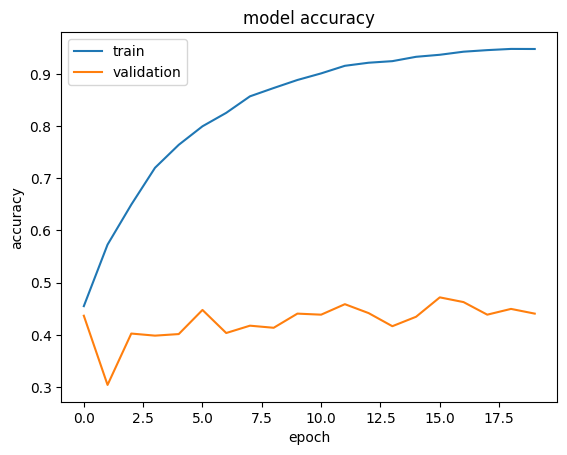

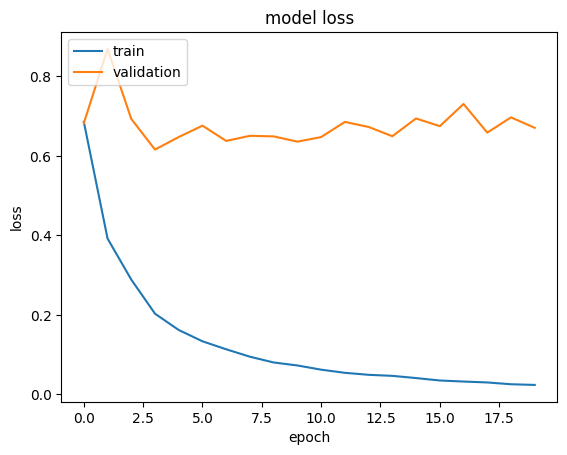

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
result = model.evaluate(test_dataset)
result

63/63 [==============================] - 44s 467ms/step - loss: 0.7090 - accuracy: 0.4457 - precision: 0.4465 - recall: 0.3986


[0.7090259194374084,
 0.445668488740921,
 0.4465065598487854,
 0.39863547682762146]

In [24]:
# load_model = tf.keras.saving.load_model('/content/drive/MyDrive/ResearchWork_2023/models/model_4.h5',compile=False)

In [25]:
import numpy as np

# Assuming you have a test dataset 'test_data' with image tensors and corresponding labels
predictions = []
true_labels = []

# Iterate over the test dataset and make predictions
for images, labels in test_dataset:
    preds = model.predict(images)
    predictions.extend(np.argmax(preds, axis=1))
    true_labels.extend(np.argmax(labels, axis=1))

# Compute the confusion matrix
cm = tf.math.confusion_matrix(true_labels, predictions)

# Convert the confusion matrix to a NumPy array and print it
print("Confusion Matrix:")
print(cm.numpy())


1/1 [==============================] - 0s 162ms/step
Confusion Matrix:
[[617 161  12   6   2   6   1  39]
 [116  74   1   0   0   0   2  20]
 [ 46   8   9   2   2   0   0  12]
 [ 16   9   1  63   0   0   0   5]
 [ 41  15   1   0   3   0   0  13]
 [ 20  10   0   0   0   2   0   3]
 [ 10   1   1   2   0   0  47   2]
 [281 147  12  12   9   1  59  75]]
